# **PRE-PROCESSING DATA TIDAK TERSTRUKTUR LANJUTAN**

## **1. Thresholding Data Citra**

### **1.1. Import Library**

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2

### **1.2. Import gambar dengan method `.imread()` dari package `cv2`**

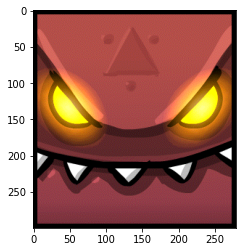

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Saved-Pictures/IMG20200529075545 (1).jpg")
plt.imshow(img)

### **1.3. Mengubah komposisi warna dari BGR menjadi RGB menggunakan method `.cvtColor()`**

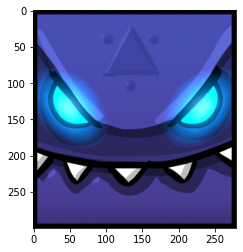

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### **1.4. Grayscaling citra**

In [ ]:
# grayscaling
img_grayscale_temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_grayscale = cv2.cvtColor(img_grayscale_temp, cv2.COLOR_GRAY2RGB)

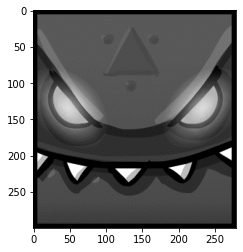

In [ ]:
plt.imshow(img_grayscale)

### **1.5. Thresholding menggunakan `cv2`**

In [ ]:
ret, threshold_img = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_BINARY)

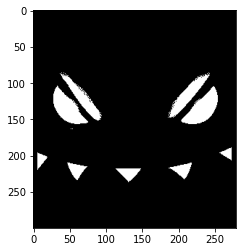

In [ ]:
plt.imshow(threshold_img)

## **2. Pre-Processing Data Teks**

### **2.1. Import Library**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### **2.2. Pre-Processing**

In [ ]:
tokenizer = Tokenizer(num_words=20, oov_token="-")

In [ ]:
text = ["The reason that the skeleton is always so calm is because nothing can get under his skin",
        "One of the reasons the skeleton was not allowed to play church music is because he had no organs",
        "The one instrument that the skeleton can play better than others is the trombone"]

In [ ]:
_ = tokenizer.fit_on_texts(text)
print(_)

None


In [ ]:
seq = tokenizer.texts_to_sequences(text)
print(seq)

[[2, 10, 5, 2, 4, 3, 11, 12, 13, 3, 6, 14, 7, 15, 16, 17, 18], [8, 19, 2, 1, 2, 4, 1, 1, 1, 1, 9, 1, 1, 3, 6, 1, 1, 1, 1], [2, 8, 1, 5, 2, 4, 7, 9, 1, 1, 1, 3, 2, 1]]


In [ ]:
print(tokenizer.word_index)

{'-': 1, 'the': 2, 'is': 3, 'skeleton': 4, 'that': 5, 'because': 6, 'can': 7, 'one': 8, 'play': 9, 'reason': 10, 'always': 11, 'so': 12, 'calm': 13, 'nothing': 14, 'get': 15, 'under': 16, 'his': 17, 'skin': 18, 'of': 19, 'reasons': 20, 'was': 21, 'not': 22, 'allowed': 23, 'to': 24, 'church': 25, 'music': 26, 'he': 27, 'had': 28, 'no': 29, 'organs': 30, 'instrument': 31, 'better': 32, 'than': 33, 'others': 34, 'trom': 35, 'bone': 36, 'trombone': 37}


In [ ]:
seq_equal_len = pad_sequences(seq, padding="pre", maxlen=17)

In [ ]:
print(seq_equal_len)

[[ 2 10  5  2  4  3 11 12 13  3  6 14  7 15 16 17 18]
 [ 2  1  2  4  1  1  1  1  9  1  1  3  6  1  1  1  1]
 [ 0  0  0  2  8  1  5  2  4  7  9  1  1  1  3  2  1]]


In [ ]:
text_2 = [
          "The skeleton was depressed because he didn’t have any body to love",
          "Saw a skeleton do stand up… it was humerus",
          "Skeletons can’t help being afraid of storms since they have no guts"
]

In [ ]:
text_3 = "Skeletons start a lot of fights since they often have bones to pick"

In [ ]:
tokenizer_nltk = nltk.word_tokenize(text_3)

In [ ]:
print(tokenizer_nltk)

['Skeletons', 'start', 'a', 'lot', 'of', 'fights', 'since', 'they', 'often', 'have', 'bones', 'to', 'pick']


## **3. Pre-Processing Data Audio/Sinyal**

### **3.1 Import Library**

In [ ]:
import IPython.display as idp
import librosa.display
import librosa

### **3.2 Import File Audio**

In [ ]:
audio_data = "/content/drive/MyDrive/Datasets/sus.mp3"

### **3.3 Load Audio Agar Dapat Diproses Seperti Halnya Data Citra**

In [ ]:
x, sr = librosa.load(audio_data)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(sr)

22050


### **3.4 Processing Data Audio Agar File Dapat Diputar**

In [ ]:
idp.Audio(audio_data)

### **3.5 Menampilkan Plot Dari File Audio**

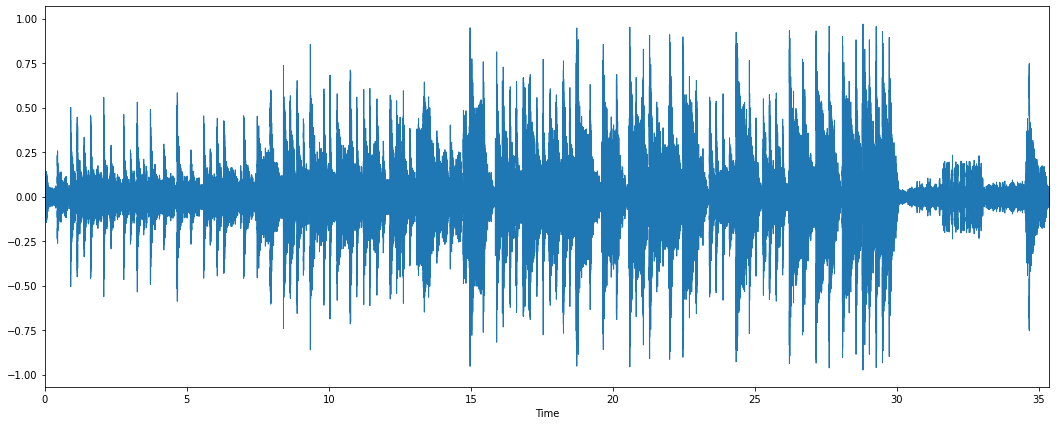

In [ ]:
plt.figure(figsize=(18, 7))
librosa.display.waveplot(x, sr)